<a href="https://colab.research.google.com/github/MaliniVibin1502/pythonprojects/blob/main/Medical_Insurance_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a prodject for Medical Insurance Price Prediction. This is a filtered and modified version of the Medical Insurance Price Prediction dataset, available under the CC0 1.0 Universal License on the Kaggle website. This is a project done for IBM Data Science Professional course via Coursera.

In this project, I will be:

- Load the data as a pandas dataframe
- Clean the data, taking care of the blank entries
- Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
- Develop single variable and multi variable Linear Regression models for predicting the charges
- Use Ridge regression to refine the performance of Linear regression models.

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sb
%matplotlib inline

In [295]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

Load the data as a pandas dataframe
----


In [296]:
headers=["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
mi=pd.read_csv("https://raw.githubusercontent.com/MaliniVibin1502/pythonprojects/main/data/medical_insurance_dataset.csv")
mi.columns=headers

In [297]:
mi.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


Clean the data, taking care of the blank entries
------


In [298]:
mi.replace("?",np.nan,inplace=True)

In [299]:
mi.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160


In [300]:
print(mi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using df.info().

In [301]:
mi['age']=mi['age'].astype(float)
mi['age']

0       18.0
1       28.0
2       33.0
3       32.0
4       31.0
        ... 
2766    47.0
2767    21.0
2768    19.0
2769    23.0
2770    54.0
Name: age, Length: 2771, dtype: float64

In [302]:
mean_age=mi['age'].mean(axis=0)
mean_age


39.11709432598482

In [303]:
mi.replace(np.nan,mean_age,inplace=True)

In [304]:
mi['age']=mi['age'].astype('int')

In [305]:
is_smoker = mi['smoker'].value_counts().idxmax()



In [306]:
mi["smoker"].replace(np.nan,is_smoker,inplace=True)

In [307]:
mi['smoker']=mi['smoker'].astype('int')

In [308]:
mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int64  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


Exploratory Data Analysis (EDA)
----------


(0.0, 54.9885)

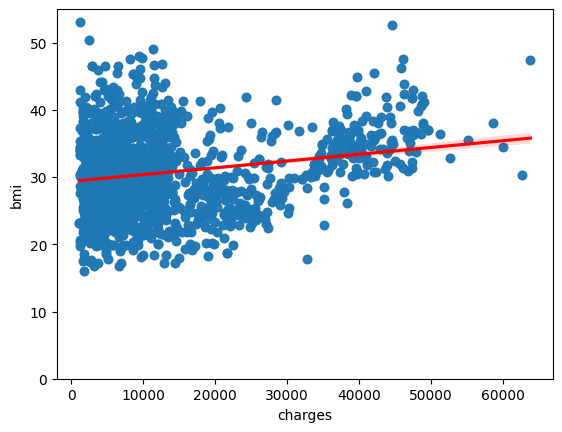

In [309]:
sb.regplot(x='charges',y='bmi',data=mi,line_kws={"color":"red"})
pyplot.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

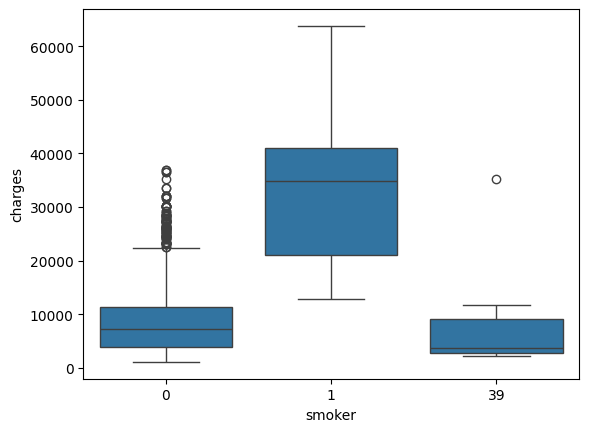

In [310]:
sb.boxplot(x='smoker',y='charges',data=mi)

In [311]:
mi.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.016989,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.009008,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,-0.035577,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,-0.002746,-0.025594,0.066551
smoker,-0.016989,0.009008,-0.035577,-0.002746,1.000000,-0.001112,0.143476
region,-0.006969,0.022360,0.271200,-0.025594,-0.001112,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.143476,0.054018,1.000000


Model Development
------
- Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the $ R^2 $
 score of this model.

- Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the $ R^2 $
 score of this model. You should see an improvement in the performance.

- Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [312]:
lr=LinearRegression()
x=mi[['smoker']]
y=mi['charges']
lr.fit(x,y)
y_predict=lr.predict(x)


In [313]:
r_square=lr.score(x,y)


In [314]:
print("R sqaure value using linear regression on attributes Smoker and Charges is:", r_square)

R sqaure value using linear regression on attributes Smoker and Charges is: 0.020585299824132375


In [315]:
lr1=LinearRegression()
z=mi[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
y=mi['charges']


In [316]:
lr1.fit(z,y)
y_mpredict=lr1.predict(z)

In [317]:
r_msquare=lr1.score(z,y)

In [318]:
print("R sqaure value using linear regression on all attributes in dataset with Charges is:", r_msquare)

R sqaure value using linear regression on all attributes in dataset with Charges is: 0.14815183114624353


In [319]:
Input=[('scale', StandardScaler()), ('polynomial',PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [320]:
pipe=Pipeline(Input)

In [325]:
z=mi[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]

In [326]:
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [327]:
lr2=LinearRegression()
lr2.fit(z,y)
y_pipe=pipe.predict(z)

In [329]:
print(r2_score(y,y_pipe))

0.7676416519365656


Model Refinement
-----

- Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

- Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data subset. Print the $ R^2 $ score for the testing data.

- Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.

In [331]:
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)

In [334]:
RidgeModel=Ridge(alpha=0.1)

In [335]:
RidgeModel.fit(x_train,y_train)

Ridge(alpha=0.1)

In [336]:
y_predict=RidgeModel.predict(x_test)

In [337]:
print(r2_score(y_test,y_predict))

0.1455982847601478


In [338]:
pr=PolynomialFeatures(degree=2,include_bias=False)

In [339]:
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.5968802162875089
